#Análise Exploratória de Microdados do ENEM


Neste projeto, tenho como objetivo entender, através dos microdados disponibilizados pelo Governo Federal sobre o ENEM 2021, quais fatores presentes nestes dados influenciam a performance do estudante na prova.

Temos diversos tipos de informações aqui que podem influenciar as performances, mas gostaria de focar nas características que podem representar algum tipo de desigualdade social e entender como essas desigualdades impactam os estudantes.

Partindo dessa premissa,procurareirei explorar características que sejam marcadores de diferença social como:
- Raça
- Classe
- Gênero
- Moradia Rural/Urbana

Isso será realizado através de análise exploratória dos dados, utilizando ferramentas do Python e demonstração dos resultados através de gráficos. Utilizarei as bibliotecas:
- Pandas
- Seaborn
- Matplotlib
- NumPy

Os dados foram extraídos de: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem


###A principal questão a responder é:



Como determinar o impacto que marcadores de diferença social (classe, raça, gênero) tem nos resultados do estudante na nota da prova?




#Seção 1: Preparando os Dados

Importando as bibliotecas necessárias ao projeto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Acessando os Dados Através do Arquivo, presente no meu Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
microdados_brutos =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto ENEM/MICRODADOS_ENEM_2021.csv',  sep=';', encoding='iso-8859-1')
microdados_brutos.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


##Limpando do Dataset
Os candidatos com abstenções não são relevantes para o objetivo da nossa análise, por isso estamos limpando as entradas com abstenções do Dataset, para que esses dados não poluam o restante da análise.



In [4]:
microdados_brutos.shape

(3389832, 76)

Abaixo, faremos uma limpeza de todos os candidatos que tiveram a nota da redação como nula no nosso DataFrame bem como todos os candidatos que faltaram em algum dos dias de prova.

In [5]:
microdados = microdados_brutos
selecao = microdados['NU_NOTA_REDACAO'].isnull() == False
microdados = microdados[selecao]
selecao = microdados["TP_PRESENCA_CN"] != 0
microdados = microdados[selecao]
selecao = microdados["TP_PRESENCA_MT"] != 0
microdados = microdados[selecao]
selecao = microdados["TP_PRESENCA_CH"] != 0
microdados = microdados[selecao]
selecao = microdados["TP_PRESENCA_LC"] != 0
microdados = microdados[selecao]
microdados.shape

(2239528, 76)

Também optei por limpar os candidatos treineiros

In [6]:
selecao = microdados['IN_TREINEIRO'] == 0
microdados = microdados[selecao]
microdados.shape

(1871927, 76)

#Seção 2: Conhecendo os Dados



Aqui, utilizarei alguns métodos estatísticos para conhecer melhor os dados.

Me apoiarei no dicionário dos dados, também disponibilizado pelo INEP e presente no mesmo arquivo. Sempre que necessário, irei traduzir os dados com explicações.

A seguir, listo as informações mais relevantes, as variáveis dependentes, ou seja, sobre quem desejo medir os impactos das outras variáveis: as notas dos alunos em diferentes disciplinas da prova.

- Matemática
- Ciências Humanas
- Ciências da Natureza
- Linguagens e Códigos
- Redação

Também acrescentei uma coluna "NU_NOTA_SOMA", somando todas as colunas de nota, para ter uma noção geral do meu desempenho como estudante. É importante ressaltar que o cálculo da nota final do estudante pelo ENEM não é realizado dessa maneira; ele leva em conta diversos fatores. Optei por realizar um cálculo simplificado por não ter acesso aos detalhes de dados para replicar o cálculo oficial.

In [7]:
microdados['NU_NOTA_SOMA'] = (microdados['NU_NOTA_MT'] + microdados['NU_NOTA_CH'] + microdados['NU_NOTA_CN'] + microdados['NU_NOTA_LC'] + microdados['NU_NOTA_REDACAO'])
microdados['NU_NOTA_SOMA']

<ipython-input-7-e6b28fd23f82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microdados['NU_NOTA_SOMA'] = (microdados['NU_NOTA_MT'] + microdados['NU_NOTA_CH'] + microdados['NU_NOTA_CN'] + microdados['NU_NOTA_LC'] + microdados['NU_NOTA_REDACAO'])


1          2577.5
3          3338.0
4          2850.3
8          2428.0
9          2334.7
            ...  
3389793    2017.9
3389807    2220.7
3389814    3131.5
3389815    2194.4
3389830    3126.8
Name: NU_NOTA_SOMA, Length: 1871927, dtype: float64

Conhecendo os tipos de dados presentes no nosso DataFrame

In [8]:
pd.DataFrame(microdados.dtypes)

,0
NU_INSCRICAO,int64
NU_ANO,int64
TP_FAIXA_ETARIA,int64
TP_SEXO,object
TP_ESTADO_CIVIL,int64
...,...
Q022,object
Q023,object
Q024,object
Q025,object


E utilizamos um método do pandas para trazer uma análise estátistica descritiva dessas variáveis

In [28]:
descricoes = pd.DataFrame(microdados['NU_NOTA_MT'].describe().round(2))
descricoes['Ciencias Humanas'] = microdados['NU_NOTA_CH'].describe().round(2)
descricoes['Ciencias da Natureza'] = microdados['NU_NOTA_CN'].describe().round(2)
descricoes['Linguagens e Códigos'] = microdados['NU_NOTA_LC'].describe().round(2)
descricoes['Redacao'] = microdados['NU_NOTA_REDACAO'].describe().round(2)
descricoes['Nota Soma'] = microdados['NU_NOTA_SOMA'].describe().round(2)
descricoes.rename(columns={'NU_NOTA_MT': 'Matemática'}, inplace=True)

descricoes.to_csv('/content/drive/MyDrive/Colab Notebooks/Projeto ENEM/datasets/dataset_descricoes.csv')
descricoes

,Matemática,Ciencias Humanas,Ciencias da Natureza,Linguagens e Códigos,Redacao,Nota Soma
count,1870724.00,1870724.00,1870724.00,1870724.00,1870724.00,1870724.00
mean,534.46,524.72,493.47,504.75,623.70,2681.09
std,112.05,95.61,81.89,79.30,183.11,451.66
min,0.00,0.00,0.00,0.00,0.00,320.00
25%,443.10,449.10,431.70,448.50,520.00,2353.50
50%,513.10,526.70,483.00,507.80,620.00,2634.10
75%,613.50,594.50,548.00,561.60,740.00,2979.00
max,953.10,846.90,867.10,826.10,1000.00,4313.40


Um problema que notei é que, para a prova de Matemática e Ciências da Natureza, tive um valor de contagem inferior ao valor das demais.

Também notei que o valor mínimo para a característica de todas as Notas Somadas é 0, o que implica não ter pontuado em nenhuma competência, algo muito estranho para alguém com a prova regular.

Vou tratar ambos os problemas detectados para deixar meus dados mais confiáveis, fazendo uma limpeza adicional nos dados.

In [10]:
selecao = microdados['NU_NOTA_MT'].isnull() == False
microdados = microdados[selecao]
selecao = microdados["NU_NOTA_SOMA"] > 0
microdados = microdados[selecao]

In [11]:
descricoes = pd.DataFrame(microdados['NU_NOTA_MT'].describe().round(2))
descricoes['Ciencias Humanas'] = microdados['NU_NOTA_CH'].describe().round(2)
descricoes['Ciencias da Natureza'] = microdados['NU_NOTA_CN'].describe().round(2)
descricoes['Linguagens e Códigos'] = microdados['NU_NOTA_LC'].describe().round(2)
descricoes['Redacao'] = microdados['NU_NOTA_REDACAO'].describe().round(2)
descricoes['Nota Soma'] = microdados['NU_NOTA_SOMA'].describe().round(2)
descricoes.rename(columns={'NU_NOTA_MT': 'Matemática'}, inplace=True)
descricoes

,Matemática,Ciencias Humanas,Ciencias da Natureza,Linguagens e Códigos,Redacao,Nota Soma
count,1870724.00,1870724.00,1870724.00,1870724.00,1870724.00,1870724.00
mean,534.46,524.72,493.47,504.75,623.70,2681.09
std,112.05,95.61,81.89,79.30,183.11,451.66
min,0.00,0.00,0.00,0.00,0.00,320.00
25%,443.10,449.10,431.70,448.50,520.00,2353.50
50%,513.10,526.70,483.00,507.80,620.00,2634.10
75%,613.50,594.50,548.00,561.60,740.00,2979.00
max,953.10,846.90,867.10,826.10,1000.00,4313.40


Agora não conseguimos encontrar nada que indique algum registro irregular em nosso dataset, temos notas minímas 0 para todas as competências individualmente, mas esses são casos que queremos considerar, desde que o participante não tenha zerado completamente a prova

In [12]:
#Contabilizando os dados pós-tratamento
microdados.shape[0]

1870724

Queremos também entender o comportamento estatístico geral da nossa variável NU_NOTA_SOMA de maneira gráfica, para entender o que esperar do seu comportamento nas medições a seguir.

Para isso, primeiro usaremos um gráfico boxplot, entendendo a distribuição normal das notas e entender onde estão os outliers dentro desses dados

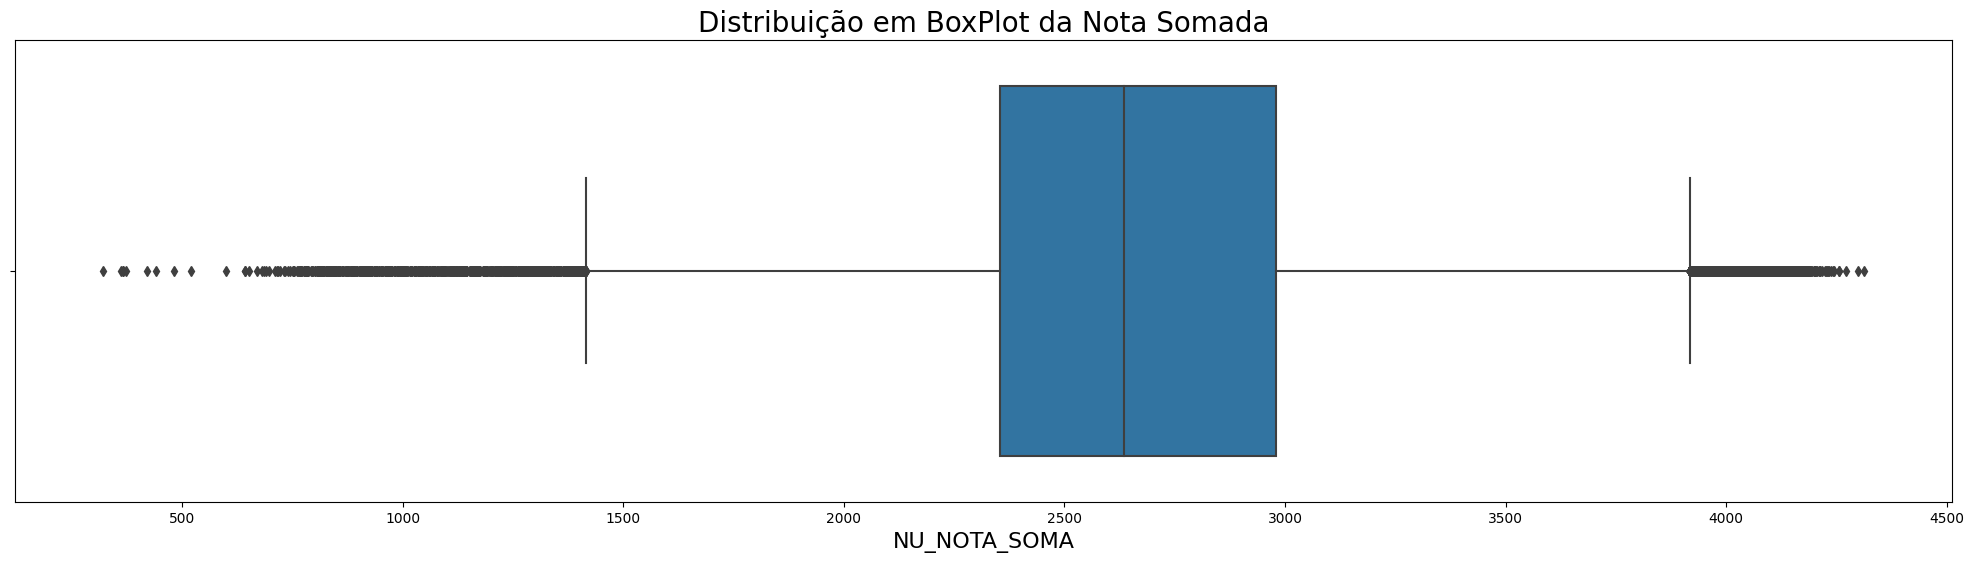

In [13]:
#FAZER UM PLOT BAR E UM HISTOGRAMA DA MÉDIA
fig, ax = plt.subplots(figsize=(25,6))

ax.set_title('Distribuição em BoxPlot da Nota Somada', fontsize=20)
ax.set_xlabel('Nota Somada dos Alunos', fontsize=16)
ax = sns.boxplot(x='NU_NOTA_SOMA', data=microdados)

Vi que existem alguns outliers nos nossos dados, mas optei por não tratá-los por não considerar que são necessariamente problemáticos e refletem a realidade

Para complementar a análise de distribuição, também utilizaremos um histograma

<ipython-input-14-adfb33bf816b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(microdados['NU_NOTA_SOMA'])


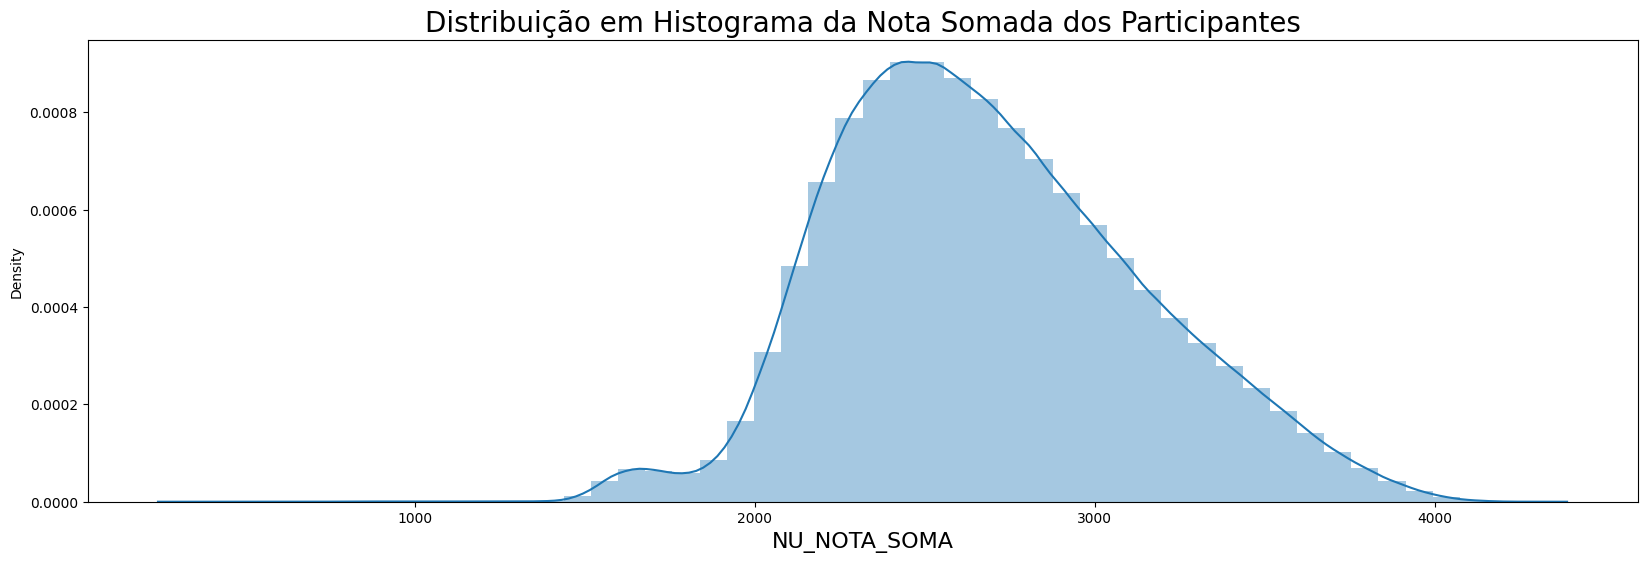

In [14]:
#FAZER UM PLOT BAR E UM HISTOGRAMA DA MÉDIA
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Distribuição em Histograma da Nota Somada dos Participantes', fontsize=20)
ax.set_xlabel('Nota Somada dos Alunos', fontsize=16)
ax = sns.distplot(microdados['NU_NOTA_SOMA'])

Aqui vemos que uma distribuição levemente assimétrica a direita, mas também algo que parece normal levando em conta nossos dados, e que por enquanto não necessita de tratativa adicional

#Seção 3: Respondendo as Perguntas

## Questão 1: É possível determinar que marcadores de diferença social (classe, raça, gênero) influenciam nos resultados do estudante?

Vamos começar explorando se os marcadores de Raça e Gênero possuem alguma influência no desempenho. Isso pois não há característica determinante dedicada prévia da classe econômica do estudante no dataset. Para isso precisaremos inferir isso a partir de outras características que indiquem a situação social.


### Marcador racial

Para ver como a raça do estudante influência no resultado, irei usar a característica TP_COR_RACA, e traduzir ela conforme presente no dicionário de dados disponibilizado.

Importante ressaltar que essas informações raciais são sempre autodeclaradas. Também é importante ressaltar que essa análise se trata de entender que no Brasil a raça tem forte relação histórica e estatística com a situação econômica da população e é por esse motivo que acho tal análise relevante.



In [29]:
grupo_raça = microdados.groupby('TP_COR_RACA').agg(
    media_nota_ciencias_humanas = ('NU_NOTA_CH', 'mean'),
    media_nota_matematica = ('NU_NOTA_MT', 'mean'),
    media_nota_ciencias_da_natureza = ('NU_NOTA_CN', 'mean'),
    media_nota_linguagens_e_codigos = ('NU_NOTA_LC', 'mean'),
    media_nota_redacao = ('NU_NOTA_REDACAO', 'mean'),
    media_nota_soma = ('NU_NOTA_SOMA', 'mean'),
    ).round(2)

grupo_raça.rename(index={0:'Não declarado',1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indígena', 6:'Não Dispõe da Informação'}, inplace=True)
grupo_raça.sort_values('media_nota_soma', ascending=True, inplace=True)
grupo_raça.to_csv('/content/drive/MyDrive/Colab Notebooks/Projeto ENEM/datasets/dataset_grupo_raça.csv')


grupo_raça

,media_nota_ciencias_humanas,media_nota_matematica,media_nota_ciencias_da_natureza,media_nota_linguagens_e_codigos,media_nota_redacao,media_nota_soma
TP_COR_RACA,,,,,,
Indígena,473.19,473.22,451.02,453.94,525.51,2376.88
Não Dispõe da Informação,530.55,426.80,501.50,459.05,490.00,2407.90
Preta,505.89,501.16,472.67,488.35,588.32,2556.39
Parda,506.85,512.00,477.74,487.98,599.16,2583.74
Não declarado,529.00,533.22,496.34,506.11,603.21,2667.88
Amarela,518.83,537.94,495.01,499.88,620.45,2672.11
Branca,548.72,567.12,515.48,527.03,660.69,2819.03


Text(0, 0.5, 'Média das Notas Somadas')

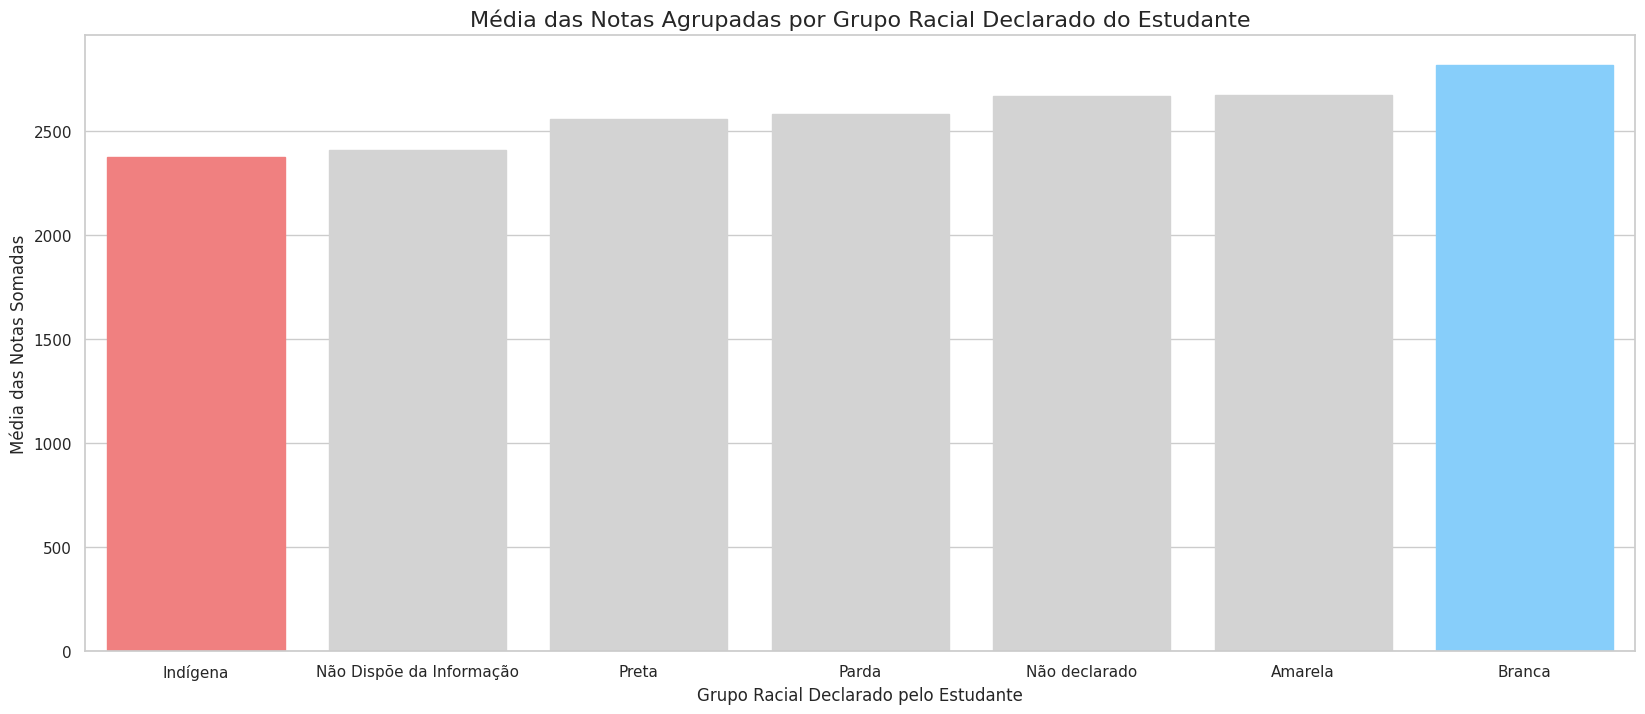

In [42]:
fig, ax = plt.subplots(figsize=(20, 8))

# Crie um gráfico de barras usando o seaborn
sns.barplot(x=grupo_raça.index, y='media_nota_soma', data=grupo_raça, ax=ax)

# Encontrando com a maior média de notas
raça_maior_media = grupo_raça.loc[grupo_raça['media_nota_soma'].idxmax()]

# Encontre a raça com a menor média de notas
raça_menor_media = grupo_raça.loc[grupo_raça['media_nota_soma'].idxmin()]

# Percorra as barras do gráfico e defina as cores das barras correspondentes
for idx, bar in enumerate(ax.patches):
    if grupo_raça.index[idx] == raça_maior_media.name:
        bar.set_color('lightskyblue')  # Defina a cor azul para o grupo com maior média
    elif grupo_raça.index[idx] == raça_menor_media.name:
        bar.set_color('lightcoral')  # Defina a cor vermelha para o grupo com menor média
    else:
        bar.set_color('lightgray')  # Defina a cor cinza para as outras barras

ax.set_title("Média das Notas Agrupadas por Grupo Racial Declarado do Estudante", fontsize='16')
ax.set_xlabel('Grupo Racial Declarado pelo Estudante')
ax.set_ylabel('Média das Notas Somadas')

Vemos que existe uma diferença grande, de 18.6%, entre o grupo de estudantes que se autodeclara como branco, o com a maior média, e o grupo autodeclarado indígena, que possui a menor média. Os grupos com a população autodeclarada preta e parda também tem diferenças entre 9% e 10% na média total em comparação com o grupo de maior média

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000')])

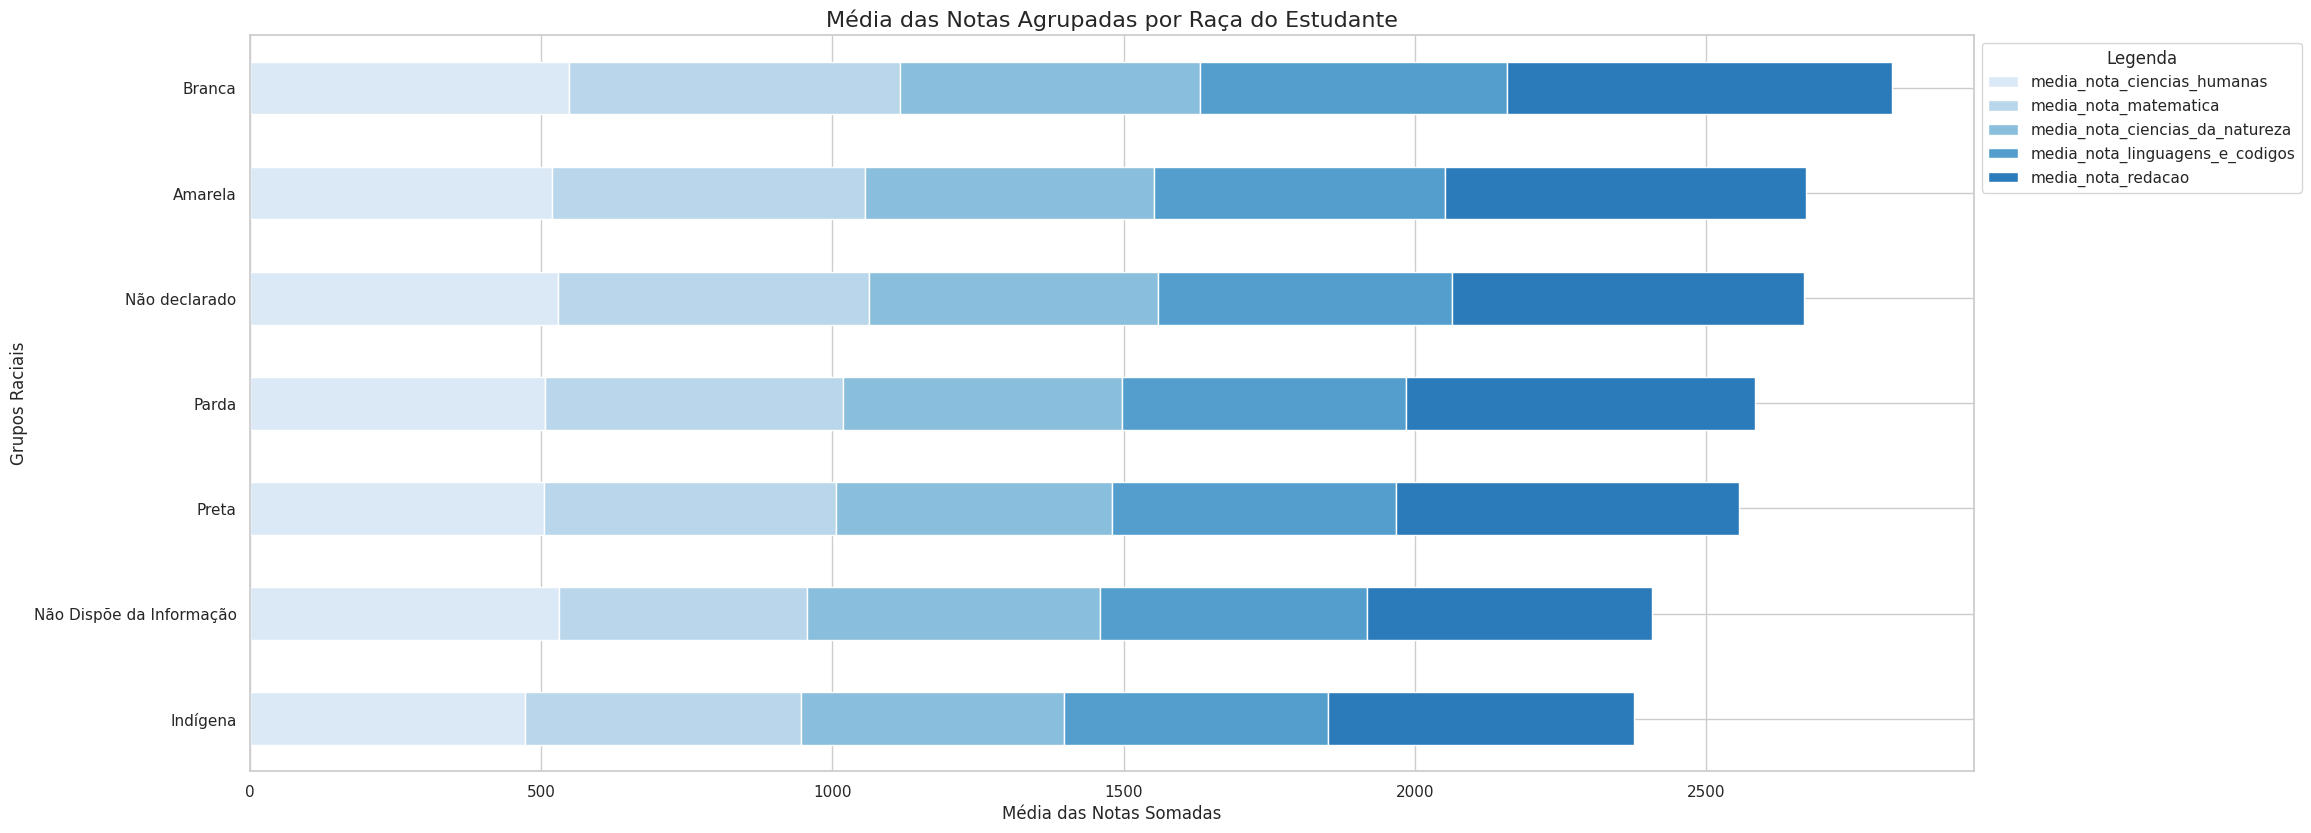

In [17]:
# Transforme o DataFrame em um formato apropriado para o Seaborn
grupo_raça_plot = grupo_raça.drop(columns='media_nota_soma')
#grupo_raça_plot = grupo_raça_plot.transpose()

# Configure o estilo Seaborn
sns.set(style="whitegrid")

# Escolha uma paleta de cores
sns.set_palette('Blues')

# Crie o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(20, 8))
grupo_raça_plot.plot(kind='barh', stacked=True, ax=ax)

# Mova a legenda para o canto superior esquerdo com mais espaço e ajuste o bbox_to_anchor
plt.tight_layout()  # Garante que os elementos não se sobreponham

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Legenda")

ax.set_title("Média das Notas Agrupadas por Raça do Estudante", fontsize='16')
ax.set_ylabel('Grupos Raciais')
ax.set_xlabel('Média das Notas Somadas')
plt.xticks(rotation=0)  # Rótulos dos eixos x na horizontal

Quando a nota entre as matérias individuais, também não parece haver nenhuma quebra no padrão registrada para média total que chame atenção.

###Marcador de Gênero

Analisando o marcador de gênero, vamos utilizar a característica TP_SEXO. Importante destacar, que nos microdados, não há informações sobre outras opções de gênero, como não-binariedade ou transgeneros, apenas apresentando as opções Feminina e Masculina.

Novamente, assim como no caso da raça, não queremos inferir nenhuma espécie de desigualdade de inteligência biológica a partir dos dados, apenas entender como a desigualdade social de gênero presente na sociedade pode ou não impactar a performance dos estudantes

Abaxo vamos analisar

In [30]:
grupo_genero = microdados.groupby('TP_SEXO').agg(
    media_nota_ciencias_humanas = ('NU_NOTA_CH', 'mean'),
    media_nota_matematica = ('NU_NOTA_MT', 'mean'),
    media_nota_ciencias_da_natureza = ('NU_NOTA_CN', 'mean'),
    media_nota_linguagens_e_codigos = ('NU_NOTA_LC', 'mean'),
    media_nota_redacao = ('NU_NOTA_REDACAO', 'mean'),
    media_nota_soma = ('NU_NOTA_SOMA', 'mean'),
    ).round(2)

grupo_genero.to_csv('/content/drive/MyDrive/Colab Notebooks/Projeto ENEM/datasets/dataset_grupo_genero.csv')

grupo_genero

,media_nota_ciencias_humanas,media_nota_matematica,media_nota_ciencias_da_natureza,media_nota_linguagens_e_codigos,media_nota_redacao,media_nota_soma
TP_SEXO,,,,,,
F,517.49,518.86,484.78,501.28,634.90,2657.31
M,535.99,558.80,507.03,510.15,606.22,2718.18


Text(0, 0.5, 'Média das Notas Somadas')

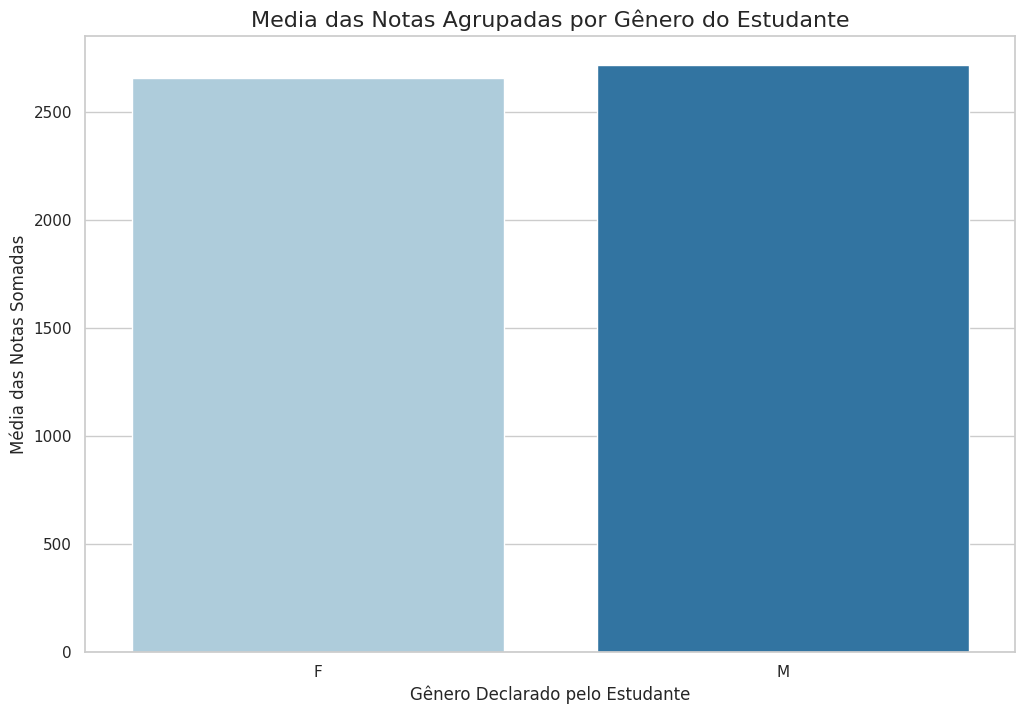

In [19]:
sns.set_palette('Paired')

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=grupo_genero.index,y='media_nota_soma', data=grupo_genero)
ax.set_title("Media das Notas Agrupadas por Gênero do Estudante", fontsize = '16')
ax.set_xlabel('Gênero Declarado pelo Estudante')
ax.set_ylabel('Média das Notas Somadas')

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000')])

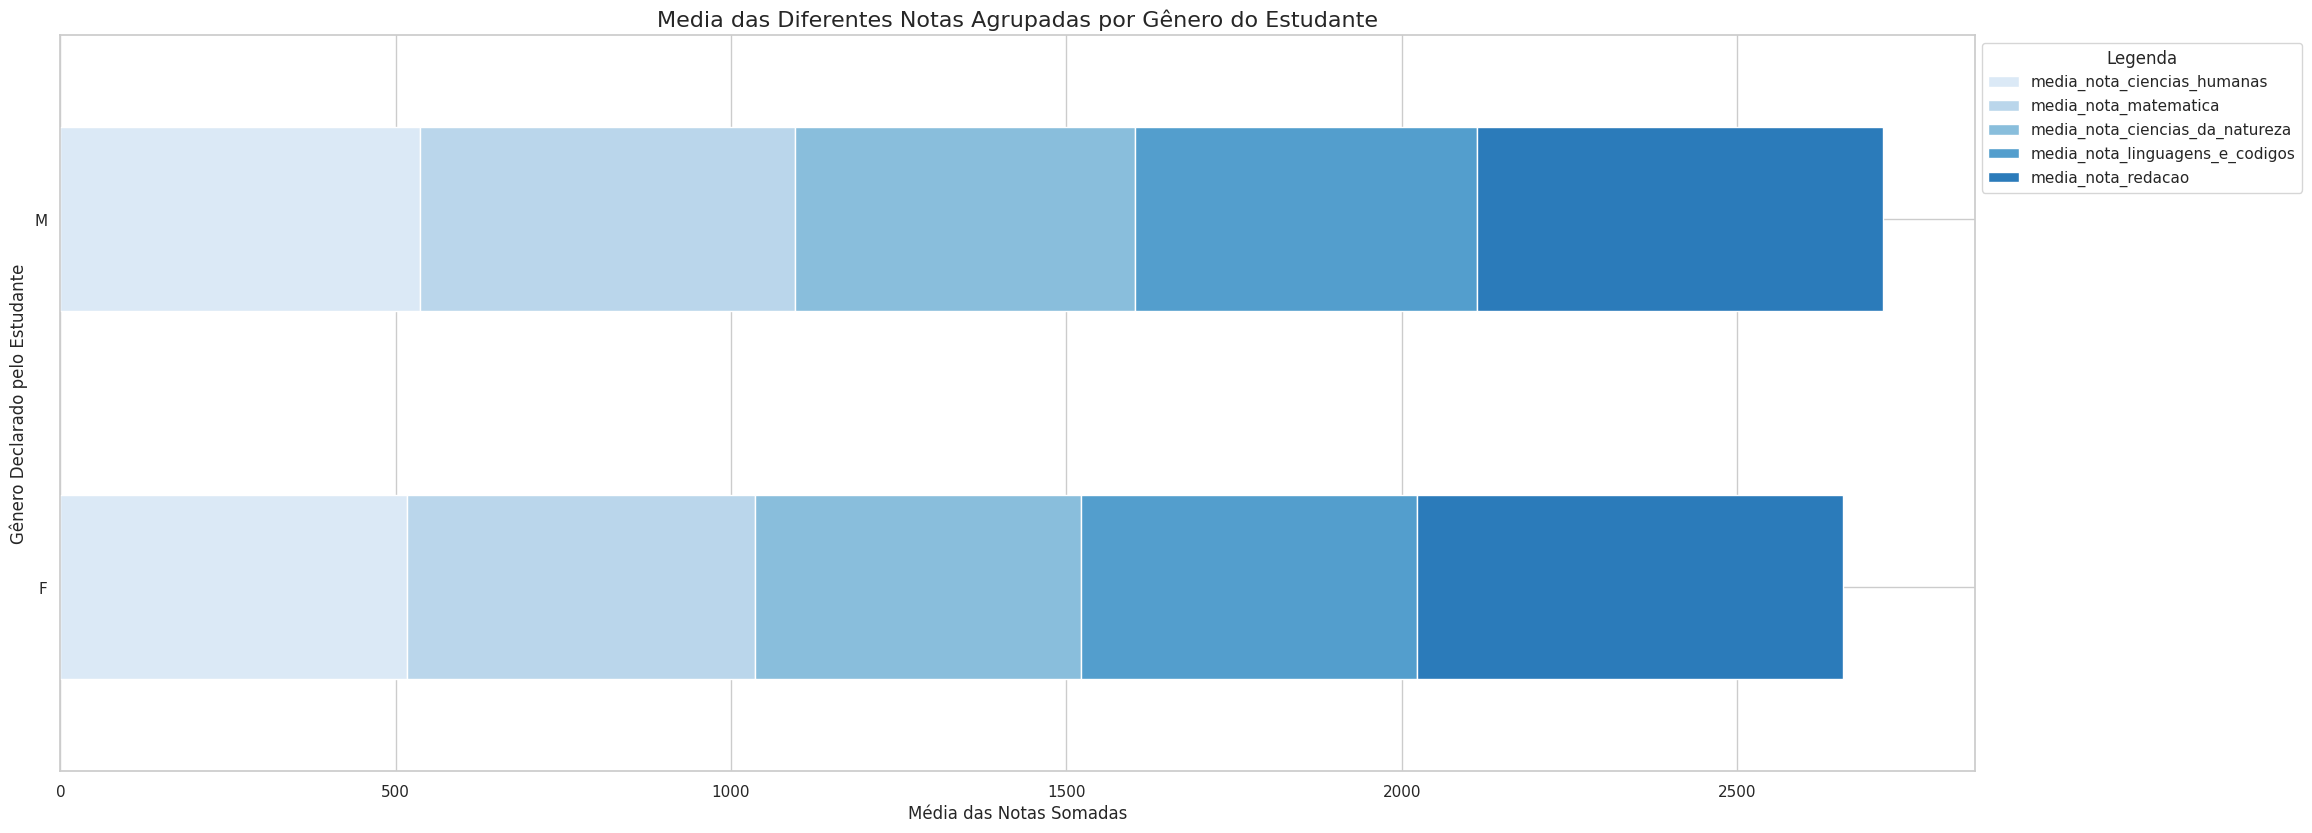

In [38]:
grupo_genero_plot = grupo_genero.drop(columns='media_nota_soma')
# Configure o estilo Seaborn
sns.set(style="whitegrid")

# Escolha uma paleta de cores
sns.set_palette('Blues')

# Crie o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(20, 8))
grupo_genero_plot.plot(kind='barh', stacked=True, ax=ax)

# Mova a legenda para o canto superior esquerdo com mais espaço e ajuste o bbox_to_anchor
plt.tight_layout()  # Garante que os elementos não se sobreponham

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Legenda")

ax.set_title("Media das Diferentes Notas Agrupadas por Gênero do Estudante", fontsize = '16')
ax.set_ylabel('Gênero Declarado pelo Estudante')
ax.set_xlabel('Média das Notas Somadas')
plt.xticks(rotation=0)  # Rótulos dos eixos x na horizontal

Dessa vez, o que foi observado é uma diferença muito menor entre os grupos, de apenas 2.3% na nota somada. É uma diferença praticamente insignificante, se considerarmos que a diferença salarial no país é dez vezes maior de acordo com pesquisas do IBGE.

###Marcador de Classe

Para o marcador de diferença social de classe, não há nenhuma característica informada que possa determinar isso sozinha, por isso precisaremos medir algumas característica selecionadas como proxy, ou seja, que podem indiretamente nos levar a entender a classe social do estudante, são elas:

Q006: Pede ao estudante que informe a faixa de renda em que a família se encontra

TP_DEPENDENCIA_ADM_ESC: Indica o tipo de instituição de ensino do estudante

TP_LOCALIZACAO_ESC: Indica se a escola é localizada em área urbana ou rural




Primeiro vamos analisar os grupos de renda, conforme declarados na questão Q006.

É importante destacar aqui o fato de que a renda é a declarada pelo estudante, não sendo a renda declarada pela família para a Receita Federal, portanto mais sujeita a declarações falsas ou até falta de conhecimento pelo estudante.

Também é importante levar em conta que isso leva em conta somente a renda, sem considerar número de pessoas dependentes dessa renda e outros determinantes de classe como posses e bens.

In [31]:
grupo_renda = microdados.groupby('Q006').agg(
    media_nota_ciencias_humanas = ('NU_NOTA_CH', 'mean'),
    media_nota_matematica = ('NU_NOTA_MT', 'mean'),
    media_nota_ciencias_da_natureza = ('NU_NOTA_CN', 'mean'),
    media_nota_linguagens_e_codigos = ('NU_NOTA_LC', 'mean'),
    media_nota_redacao = ('NU_NOTA_REDACAO', 'mean'),
    media_nota_soma = ('NU_NOTA_SOMA', 'mean'),
    ).round(2)

grupo_renda.rename(index={'A':'Nenhuma Renda','B':'até RS1.1100','C':'De RS 1.100 até RS 1.650','D':'De RS 1.650 até RS 2.200','E':'De RS 2.200 até RS 2.750',
                          'F':'De RS 2.750 até RS 3.300','G':'De RS 3.300 até RS 4.400','H':'De RS 4.400 até RS 5.500',
                          'I':'De RS 5.500 até RS 6.600','J':'De RS 6.600 até RS 7.700','K':'De RS 7.700 até RS 8.800',
                          'L':'De RS 8.800 até RS 9.900','M':'De RS 9.900 até RS 11.000','N':'De RS 11.000 até RS 13.200',
                          'O':'De RS 13.200 até RS 16.500','P':'De RS 16.500 até RS 22.000','Q':'Acima de RS 22.000'}, inplace=True)

grupo_renda.to_csv('/content/drive/MyDrive/Colab Notebooks/Projeto ENEM/datasets/dataset_grupo_renda.csv')

grupo_renda

,media_nota_ciencias_humanas,media_nota_matematica,media_nota_ciencias_da_natureza,media_nota_linguagens_e_codigos,media_nota_redacao,media_nota_soma
Q006,,,,,,
Nenhuma Renda,472.99,470.15,450.35,454.23,537.02,2384.74
até RS1.1100,486.29,485.02,459.82,470.09,569.06,2470.28
De RS 1.100 até RS 1.650,509.44,510.04,476.94,492.33,599.11,2587.86
De RS 1.650 até RS 2.200,522.10,525.25,487.54,503.83,614.40,2653.13
De RS 2.200 até RS 2.750,534.14,544.49,499.03,515.08,633.36,2726.10
De RS 2.750 até RS 3.300,542.35,554.55,507.08,521.92,648.99,2774.89
De RS 3.300 até RS 4.400,555.38,574.06,519.73,532.57,668.75,2850.48
De RS 4.400 até RS 5.500,566.04,590.97,531.49,541.45,688.47,2918.42
De RS 5.500 até RS 6.600,574.83,604.12,541.13,548.74,704.37,2973.19


Conseguimos ver claramente através do gráfico um efeito linear do aumento da renda declarada sobre a nota do estudante, mostrando um grande impacto da desigualdade de renda sobre a nota.

[Text(0.0, 0, 'Nenhuma Renda'),
 Text(1.0, 0, 'até RS1.1100'),
 Text(2.0, 0, 'De RS 1.100 até RS 1.650'),
 Text(3.0, 0, 'De RS 1.650 até RS 2.200'),
 Text(4.0, 0, 'De RS 2.200 até RS 2.750'),
 Text(5.0, 0, 'De RS 2.750 até RS 3.300'),
 Text(6.0, 0, 'De RS 3.300 até RS 4.400'),
 Text(7.0, 0, 'De RS 4.400 até RS 5.500'),
 Text(8.0, 0, 'De RS 5.500 até RS 6.600'),
 Text(9.0, 0, 'De RS 6.600 até RS 7.700'),
 Text(10.0, 0, 'De RS 7.700 até RS 8.800'),
 Text(11.0, 0, 'De RS 8.800 até RS 9.900'),
 Text(12.0, 0, 'De RS 9.900 até RS 11.000'),
 Text(13.0, 0, 'De RS 11.000 até RS 13.200'),
 Text(14.0, 0, 'De RS 13.200 até RS 16.500'),
 Text(15.0, 0, 'De RS 16.500 até RS 22.000'),
 Text(16.0, 0, 'Acima de RS 22.000')]

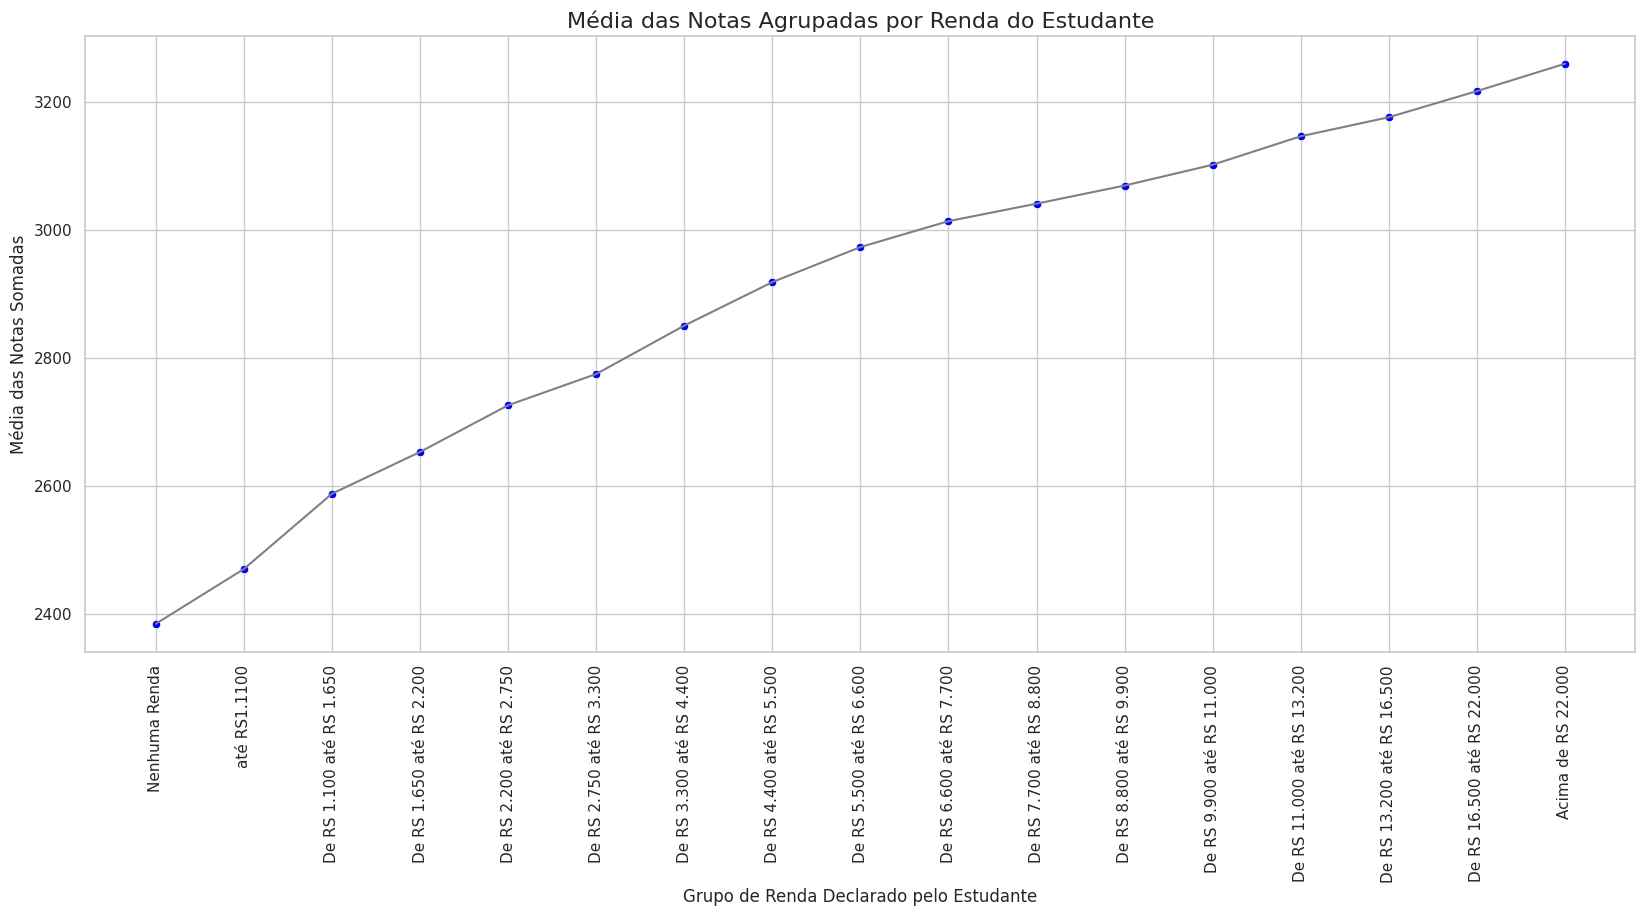

In [22]:
# GRÁFICO
fig, ax = plt.subplots(figsize=(20, 8))

# Lineplot
sns.lineplot(x=grupo_renda.index, y='media_nota_soma', data=grupo_renda, ax=ax, color='grey')

# Scatterplot
sns.scatterplot(x=grupo_renda.index, y='media_nota_soma', data=grupo_renda, ax=ax, color='blue', marker='o')

ax.set_title("Média das Notas Agrupadas por Renda do Estudante", fontsize='16')
ax.set_xlabel('Grupo de Renda Declarado pelo Estudante')
ax.set_ylabel('Média das Notas Somadas')

# Girando a legenda no eixo X
ax.set_xticks(grupo_renda.index)
ax.set_xticklabels(grupo_renda.index, rotation=90)

Entre os alunos que declaram não ter "Nenhuma Renda" na família, tivemos a nota média de 2385 na soma das notas, uma diferença muito grande, de para o grupo que declara ter uma renda familiar de "Acima de 22.000,00" que pontuou 3260 em média, 36.5% de diferença. Conseguimos observar que essa é uma variável com um impacto importantíssimo no resultado dos alunos.

A seguir, vamos analisar a dependência administrativa da escola. O indicador de se o estudante estuda em uma escola particular, apesar de alguns estudantes contarem com bolsas de estudo, pode também ser um indicador indireto de que o estudante está em uma classe de renda mais alta

In [23]:
list(microdados['TP_ESCOLA'].drop_duplicates())

[1, 2, 3]

In [32]:
grupo_tipo_escola = microdados.groupby('TP_ESCOLA').agg(
    media_nota_ciencias_humanas = ('NU_NOTA_CH', 'mean'),
    media_nota_matematica = ('NU_NOTA_MT', 'mean'),
    media_nota_ciencias_da_natureza = ('NU_NOTA_CN', 'mean'),
    media_nota_linguagens_e_codigos = ('NU_NOTA_LC', 'mean'),
    media_nota_redacao = ('NU_NOTA_REDACAO', 'mean'),
    media_nota_soma = ('NU_NOTA_SOMA', 'mean'),
    ).round(2)

grupo_tipo_escola.rename(index={1:'Não Respondeu',2:'Pública',3:'Privada'}, inplace=True)

grupo_tipo_escola.sort_values('media_nota_soma', ascending=True, inplace=True)
grupo_tipo_escola.to_csv('/content/drive/MyDrive/Colab Notebooks/Projeto ENEM/datasets/dataset_grupo_tipo_escola.csv')

grupo_tipo_escola

,media_nota_ciencias_humanas,media_nota_matematica,media_nota_ciencias_da_natureza,media_nota_linguagens_e_codigos,media_nota_redacao,media_nota_soma
TP_ESCOLA,,,,,,
Pública,498.44,508.64,469.46,485.26,583.28,2545.08
Não Respondeu,534.36,538.41,501.16,510.21,630.86,2715.01
Privada,567.55,608.09,538.99,546.16,733.34,2994.14


Text(0, 0.5, 'Média das Notas Somadas')

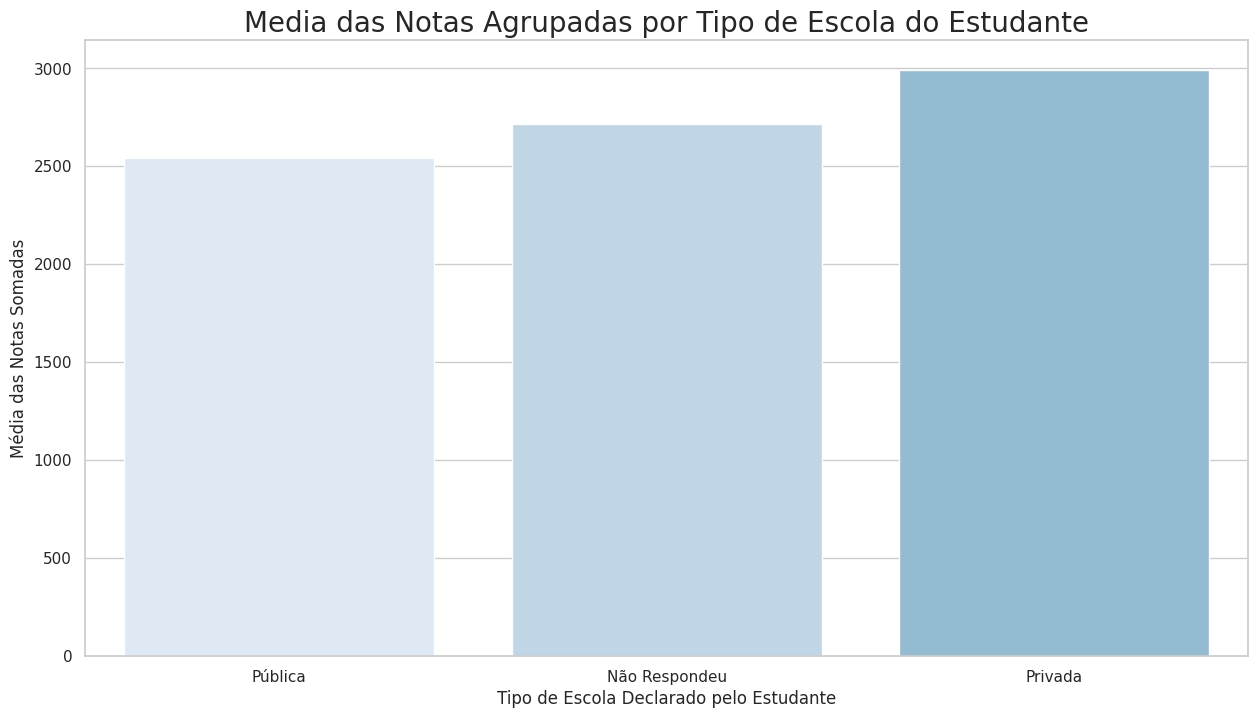

In [25]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=grupo_tipo_escola.index,y='media_nota_soma', data=grupo_tipo_escola)
ax.set_title("Media das Notas Agrupadas por Tipo de Escola do Estudante", fontsize = '20')
ax.set_xlabel('Tipo de Escola Declarado pelo Estudante')
ax.set_ylabel('Média das Notas Somadas')

O fato do aluno estudar numa escola pública no Ensino Médio durante a prova do ENEM tem um impacto de 17.6% na sua nota na prova.
É de amplo conhecimento, que no Brasil, o fato dos alunos estudarem em escola pública ou privada tem grande relação com a sua renda, com alunos de baixa renda estudando majoritariamente em escolas públicas.

Abaixo, vamos explorar como a localização da escola (Rural/Urbana) afeta a performance do estudante na prova, através da característica TP_LOCALIZAÇÃO_ESCOLA

In [33]:
grupo_local_escola = microdados.groupby('TP_LOCALIZACAO_ESC').agg(
    media_nota_ciencias_humanas = ('NU_NOTA_CH', 'mean'),
    media_nota_matematica = ('NU_NOTA_MT', 'mean'),
    media_nota_ciencias_da_natureza = ('NU_NOTA_CN', 'mean'),
    media_nota_linguagens_e_codigos = ('NU_NOTA_LC', 'mean'),
    media_nota_redacao = ('NU_NOTA_REDACAO', 'mean'),
    media_nota_soma = ('NU_NOTA_SOMA', 'mean'),
    ).round(2)

grupo_local_escola.rename(index={1:'Urbana',2:'Rural'}, inplace=True)
grupo_local_escola.sort_values('media_nota_soma', ascending=True, inplace=True)
grupo_local_escola.to_csv('/content/drive/MyDrive/Colab Notebooks/Projeto ENEM/datasets/dataset_grupo_local_escola.csv')

grupo_local_escola

,media_nota_ciencias_humanas,media_nota_matematica,media_nota_ciencias_da_natureza,media_nota_linguagens_e_codigos,media_nota_redacao,media_nota_soma
TP_LOCALIZACAO_ESC,,,,,,
Rural,492.56,505.76,470.33,475.34,564.70,2508.70
Urbana,523.10,544.56,493.69,507.28,629.17,2697.81


Text(0, 0.5, 'Média das Notas Somadas')

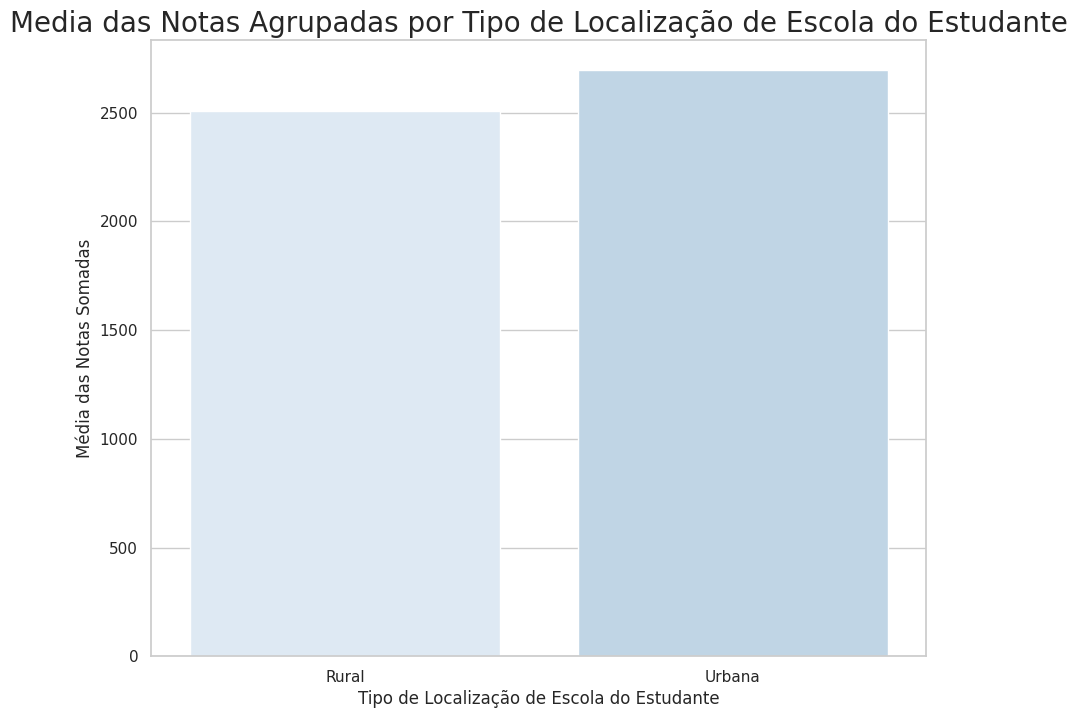

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=grupo_local_escola.index,y='media_nota_soma', data=grupo_local_escola)
ax.set_title("Media das Notas Agrupadas por Tipo de Localização de Escola do Estudante", fontsize = '20')
ax.set_xlabel('Tipo de Localização de Escola do Estudante')
ax.set_ylabel('Média das Notas Somadas')

Os dados mostram que a maior parte das principais desigualdades existentes no país, se refletem, ainda que algumas de maneira muito menor, na nota dos estudantes que prestam o ENEM. É importantíssimo entender e analisar com mais profundidade esses dados para que o Brasil possa continuar pensando políticas públicas que reduzam o impacto dessas desigualdades na vida dos estudantes.

Importante ainda destacar que diversas análises complementares podem ser feitas, por exemplo, entender como essas variáveis se afetam (Raça e Renda, por exemplo) e tentar entender melhor o comportamente de cada uma delas. Ainda é também importante relembrar que esses dados devem ser analisados levando em conta todo o cenário socioeconômico em que foram produzidos.